In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import decomposition
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import seaborn as sns
from scipy.io import loadmat

In [14]:
## Read the data.
dataset = loadmat('Indian_pines_corrected.mat')['indian_pines_corrected']
ground_truth = loadmat('Indian_pines_gt.mat')['indian_pines_gt']

In [15]:
#The dimensions of the data.
print(f'Dataset: {dataset.shape}\nGround Truth: {ground_truth.shape}')

Dataset: (145, 145, 200)
Ground Truth: (145, 145)


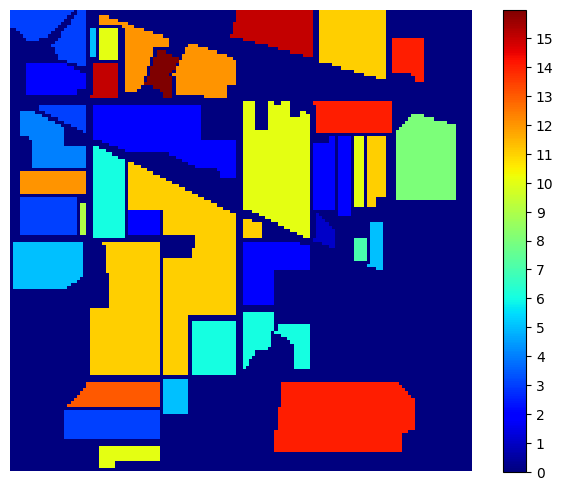

In [16]:
plt.figure(figsize=(8, 6))
plt.imshow(ground_truth, cmap='jet')
plt.axis('off')
plt.colorbar(ticks= range(0,16))
plt.show()

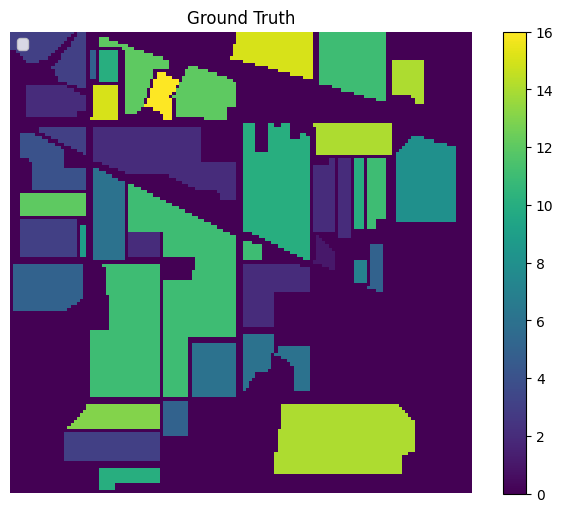

In [41]:
plt.figure(figsize=(8, 6))
plt.imshow(y, cmap='viridis')
plt.colorbar()
plt.axis('off')
plt.title('Ground Truth')
plt.gca().legend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9','10', '11', '12', '13', '14', '15', '16'], loc='upper left')


In [1]:
!pip install tqdm

You should consider upgrading via the 'C:\Users\M1074016\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [18]:
from tqdm import tqdm
import pandas as pd
def extract_pixels(dataset, ground_truth):
    df = pd.DataFrame()
    for i in tqdm(range(dataset.shape[2])):
        df = pd.concat([df, pd.DataFrame(dataset[:, :, i].ravel())], axis=1)
    df = pd.concat([df, pd.DataFrame(ground_truth.ravel())], axis=1)
    df.columns = [f'band-{i}' for i in range(1, 1+dataset.shape[2])]+['class']
    return df
        

In [19]:
df = extract_pixels(dataset, ground_truth)

100%|███████████████████████████████████████████| 200/200 [00:01<00:00, 145.94it/s]


In [20]:
df.head()

,band-1,band-2,band-3,band-4,band-5,band-6,band-7,band-8,band-9,band-10,...,band-192,band-193,band-194,band-195,band-196,band-197,band-198,band-199,band-200,class
0,3172,4142,4506,4279,4782,5048,5213,5106,5053,4750,...,1094,1090,1112,1090,1062,1069,1057,1020,1020,3
1,2580,4266,4502,4426,4853,5249,5352,5353,5347,5065,...,1108,1104,1117,1091,1079,1085,1064,1029,1020,3
2,3687,4266,4421,4498,5019,5293,5438,5427,5383,5132,...,1111,1114,1114,1100,1065,1092,1061,1030,1016,3
3,2749,4258,4603,4493,4958,5234,5417,5355,5349,5096,...,1122,1108,1109,1109,1071,1088,1060,1030,1006,3
4,2746,4018,4675,4417,4886,5117,5215,5096,5098,4834,...,1110,1107,1112,1094,1072,1087,1052,1034,1019,3


In [23]:
df.to_csv('Dataset.csv', index=False)

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [26]:
df = pd.read_csv('Dataset.csv')

In [29]:
df.head()

,band-1,band-2,band-3,band-4,band-5,band-6,band-7,band-8,band-9,band-10,...,band-192,band-193,band-194,band-195,band-196,band-197,band-198,band-199,band-200,class
0,3172,4142,4506,4279,4782,5048,5213,5106,5053,4750,...,1094,1090,1112,1090,1062,1069,1057,1020,1020,3
1,2580,4266,4502,4426,4853,5249,5352,5353,5347,5065,...,1108,1104,1117,1091,1079,1085,1064,1029,1020,3
2,3687,4266,4421,4498,5019,5293,5438,5427,5383,5132,...,1111,1114,1114,1100,1065,1092,1061,1030,1016,3
3,2749,4258,4603,4493,4958,5234,5417,5355,5349,5096,...,1122,1108,1109,1109,1071,1088,1060,1030,1006,3
4,2746,4018,4675,4417,4886,5117,5215,5096,5098,4834,...,1110,1107,1112,1094,1072,1087,1052,1034,1019,3


In [31]:
X = df.iloc[:, :-1].values

y = df.iloc[:, -1].values

In [32]:
X.shape, y.shape

((21025, 200), (21025,))

In [33]:
#Reducing dimensions from 200 to 150.

pca = PCA(n_components = 150)
principalComponents = pca.fit_transform(X)
ev=pca.explained_variance_ratio_

In [35]:
X_train, X_test, y_train, y_test, indices_train, indices_test  = train_test_split(principalComponents, y,  range(X.shape[0]), 
                                                                                  test_size = 0.15, random_state = 11)

In [36]:
X_train.shape, X_test.shape

((17871, 150), (3154, 150))

In [37]:
svm = SVC(kernel='rbf', degree = 10, gamma='scale', cache_size=1024*7)
svm.fit(X_train, y_train)

SVC(cache_size=7168, degree=10)

In [38]:
y_pred = svm.predict(X_test)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(f'Accuracy: {accuracy_score(y_test, y_pred)}%')

Accuracy: 0.7244768547875713%


You should consider upgrading via the 'C:\Users\M1074016\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


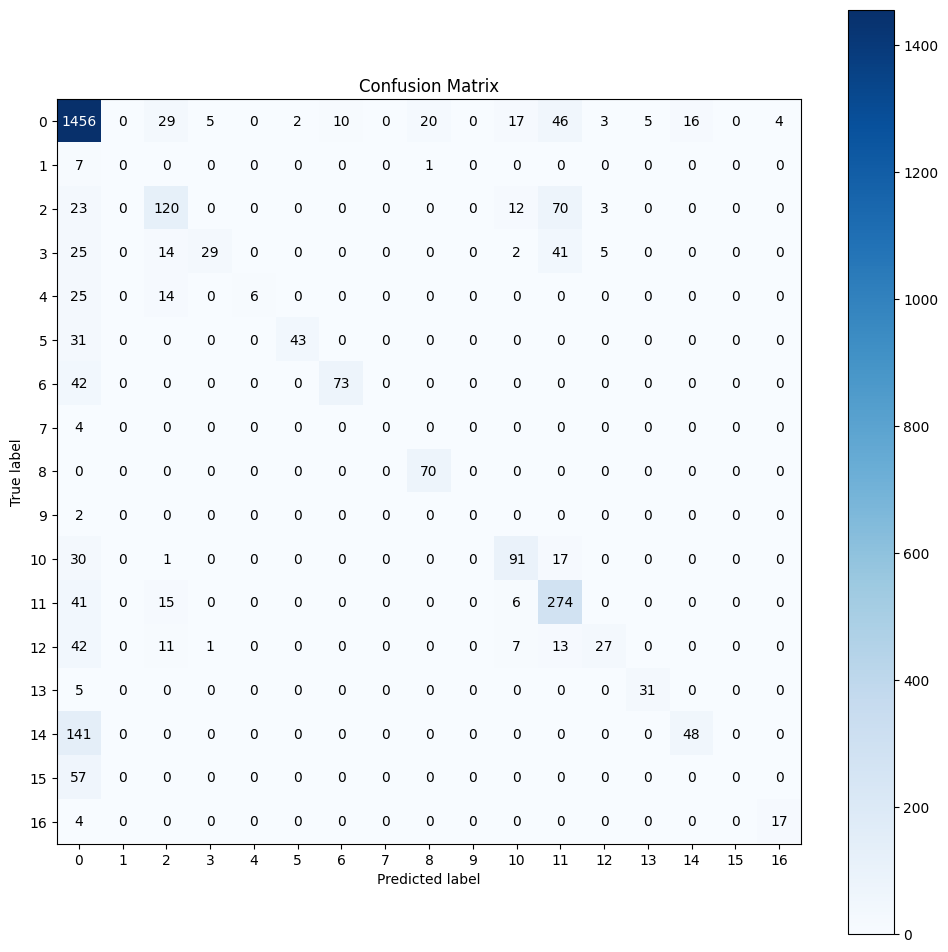

In [41]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred,
    figsize=(12,12));

In [43]:
# print(confusion_matrix(y_test,y_pred))
print('Classification report:\n',classification_report(y_test,y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.75      0.90      0.82      1613
           1       0.00      0.00      0.00         8
           2       0.59      0.53      0.56       228
           3       0.83      0.25      0.38       116
           4       1.00      0.13      0.24        45
           5       0.96      0.58      0.72        74
           6       0.88      0.63      0.74       115
           7       0.00      0.00      0.00         4
           8       0.77      1.00      0.87        70
           9       0.00      0.00      0.00         2
          10       0.67      0.65      0.66       139
          11       0.59      0.82      0.69       336
          12       0.71      0.27      0.39       101
          13       0.86      0.86      0.86        36
          14       0.75      0.25      0.38       189
          15       0.00      0.00      0.00        57
          16       0.81      0.81      0.81        21

  

C:\Users\M1074016\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\M1074016\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\M1074016\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



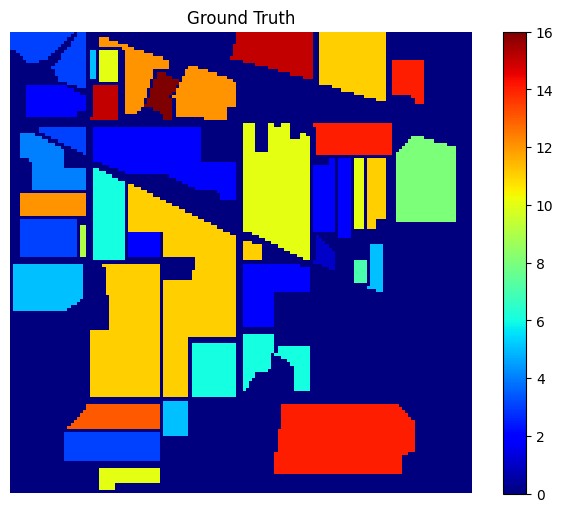

In [44]:
plt.figure(figsize=(8, 6))
plt.imshow(df.iloc[:, -1].values.reshape((145, 145)), cmap='jet')
plt.colorbar()
plt.axis('off')
plt.title('Ground Truth')
#plt.savefig('ground_truth.png')
plt.show()

In [45]:
from tqdm import tqdm
pre = y_pred

clmap = [0]*X.shape[0]

for i in tqdm(range(len(indices_train))):
    clmap[indices_train[i]] = y[indices_train[i]]

for i in tqdm(range(len(indices_test))):
    clmap[indices_test[i]] = pre[i]

100%|██████████████████████████████████████| 3154/3154 [00:00<00:00, 790441.85it/s]


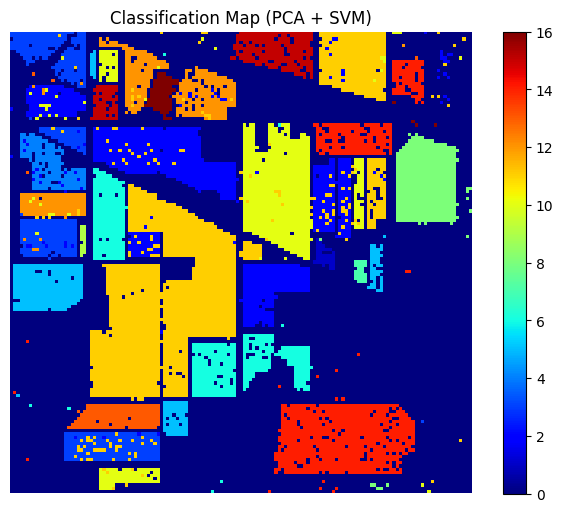

In [46]:
plt.figure(figsize=(8, 6))
plt.imshow(np.array(clmap).reshape((145, 145)), cmap='jet')
plt.colorbar()
plt.axis('off')
plt.title('Classification Map (PCA + SVM)')
plt.savefig('Classification_map.png')
plt.show()